In [1]:
!pip install ucimlrepo

In [134]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dry_bean = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean.data.features
y = dry_bean.data.targets

# metadata
print(dry_bean.metadata)

# variable information
print(dry_bean.variables)

{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and Electronic

In [135]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [136]:
y['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [137]:
y['Class'].replace(to_replace = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
                   value = [i for i in range(7)],
                   inplace = True)

<ipython-input-137-17ae000170a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class'].replace(to_replace = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],


In [138]:
X = np.array(X)
y = np.array(y)

In [139]:
p = np.arange(X.shape[0])
np.random.shuffle(p)
X = X[p]
y = y[p]

In [140]:
X = (X-X.mean(axis=0))/X.std(axis=0)

In [141]:
X_train = X[:int(.8*X.shape[0])]
X_test = X[int(.8*X.shape[0]):]
y_train = y[:int(.8*X.shape[0])]
y_test = y[int(.8*X.shape[0]):]

In [142]:
N = X_train.shape[0]
D = 16
K = 7
H = 128 #size of hidden layer
W1 = np.random.rand(D,H)
b1 = np.zeros((1,H))
W2 = np.random.rand(H,K)
b2 = np.zeros((1,K))

In [143]:
num_iters = 50000
lr = 1e-3
reg = 1e-3
batch_size = 1

In [144]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def softmax(z):
  m = np.max(z, axis = 1, keepdims = True)
  e_z = np.exp(z-m)
  return e_z/np.sum(e_z, axis = 1, keepdims = True)

In [145]:
J_history = np.zeros(num_iters)

for i in range(num_iters):
  batch = random.sample(range(N), batch_size)
  X_b = X_train[batch]
  y_b = y_train[batch]

  hidden = sigmoid(X_b.dot(W1)+b1)
  scores = hidden.dot(W2)+b2
  probs = softmax(scores)

  data_loss = -np.mean(np.log(probs[range(batch_size), y_b]))
  reg_loss = 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss

  J_history[i] = loss

  if i%1000 == 0:
    print(f"{i}th iteration loss: {loss}")

  dscores = probs
  dscores[range(batch_size), y_b] -= 1
  dscores /= batch_size
  dW2 = (hidden.T).dot(dscores)
  db2 = dscores[0]
  dhidden = dscores.dot(W2.T)
  temp = dhidden*hidden*(1-hidden)
  dW1 = (X_b.T).dot(temp)
  db1 = temp[0]

  dW1 += reg*W1
  dW2 += reg*W2

  W1 -= lr*dW1
  b1 -= lr*db1
  W2 -= lr*dW2
  b2 -= lr*db2

0th iteration loss: 6.987918724307768
1000th iteration loss: 2.134374041506324
2000th iteration loss: 0.7806765746239483
3000th iteration loss: 1.3281126353031085
4000th iteration loss: 1.2647993465231266
5000th iteration loss: 0.7019379489121507
6000th iteration loss: 1.0851630109753714
7000th iteration loss: 1.4392292489147214
8000th iteration loss: 1.7303336180787499
9000th iteration loss: 0.5993419096268089
10000th iteration loss: 1.0401235917348204
11000th iteration loss: 0.8122847788795293
12000th iteration loss: 0.5384392467256711
13000th iteration loss: 0.9119038750989972
14000th iteration loss: 0.5849417329703214
15000th iteration loss: 0.7411041811349883
16000th iteration loss: 1.0527765699558218
17000th iteration loss: 1.155146506620075
18000th iteration loss: 1.2729550218539096
19000th iteration loss: 0.7226018974108073
20000th iteration loss: 0.5338380663621446
21000th iteration loss: 0.5366369573689864
22000th iteration loss: 0.5531742479015603
23000th iteration loss: 0.7

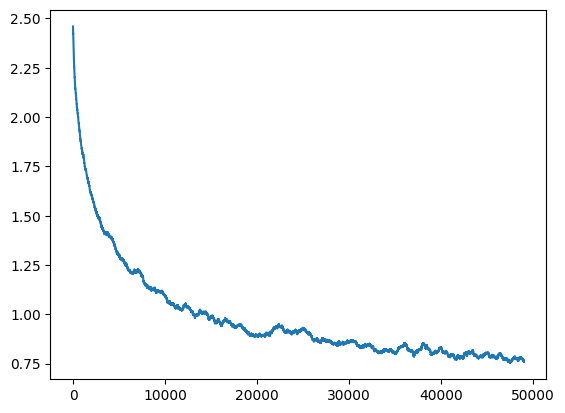

In [146]:
#moving average plot
window_size = 1000
s = J_history[:window_size].sum()
A = [s/window_size]
for i in range(window_size+1, num_iters):
  s -= J_history[i-window_size-1]
  s += J_history[i]
  A.append(s/window_size)
plt.plot(range(len(A)), A)

In [147]:
def pred(X):
  hidden = sigmoid(X.dot(W1)+b1)
  scores = hidden.dot(W2)+b2
  probs = softmax(scores)
  return np.argmax(probs, axis = 1, keepdims = True)

In [148]:
y_pred = pred(X_test)

In [149]:
100*(y_pred == y_test).sum()/len(y_pred)

90.0477414616232